# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

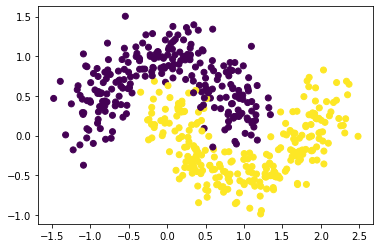

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
plt.show()

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from mlxtend.plotting import plot_decision_regions

RND_SEED = 42

X_train, X_test, y_train, y_test = train_test_split(
    moons_points,
    moons_labels,
    random_state=RND_SEED,
)

lr = LogisticRegression(
    max_iter=500,
    C=1.02,
    random_state=RND_SEED,
    tol=0.001,
)
svm = SVC(
    kernel='linear',
    tol=0.001,
    C=1.02,
    random_state=RND_SEED,
)

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=1.02, kernel='linear', random_state=42)

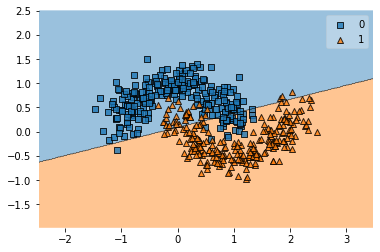

In [4]:
plot_decision_regions(moons_points, moons_labels, lr)
plt.show()

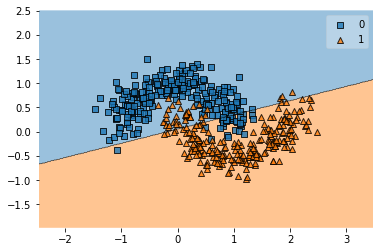

In [5]:
plot_decision_regions(moons_points, moons_labels, svm)
plt.show()

In [6]:
lr_y_pred = lr.predict(X_test)
svm_y_pred = svm.predict(X_test)
lr_f1_score = f1_score(y_test, lr_y_pred)
svm_f1_score = f1_score(y_test, svm_y_pred)

print(f'LogReg F1 score: {lr_f1_score}')
print(f'SVM F1 score: {svm_f1_score}')

LogReg F1 score: 0.8524590163934426
SVM F1 score: 0.8524590163934426


## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [7]:
def svm_model_selection(svm_params: dict, plot: str = False, model_class = SVC, \
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, plot_X=moons_points, plot_y=moons_labels) -> float:
    model = model_class(**svm_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    svm_f1_score = f1_score(y_test, y_pred)

    if plot:
        plot_decision_regions(plot_X, plot_y, model)
        plt.show()
        print(f'F1 score: {svm_f1_score}')
        
    return svm_f1_score

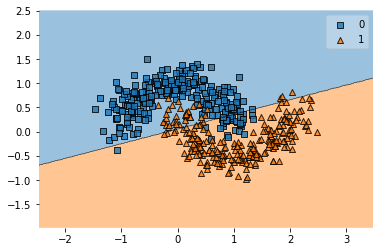

F1 score: 0.8524590163934426


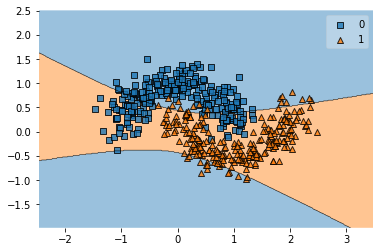

F1 score: 0.8142857142857143


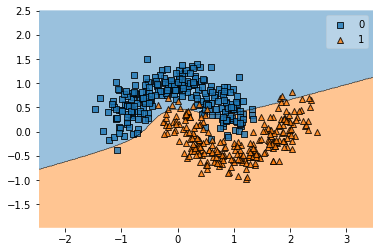

F1 score: 0.9076923076923077


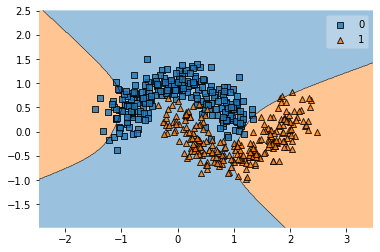

F1 score: 0.6862745098039216


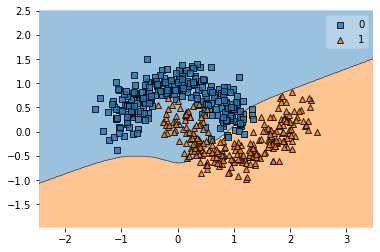

F1 score: 0.7889908256880733


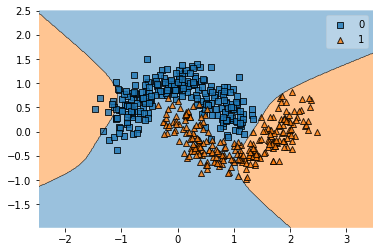

F1 score: 0.6530612244897959


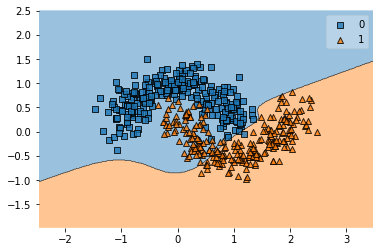

F1 score: 0.7924528301886793


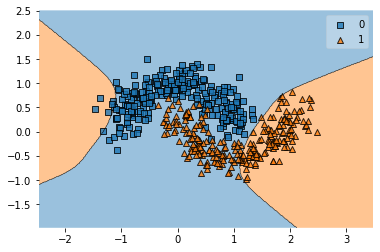

F1 score: 0.6458333333333334


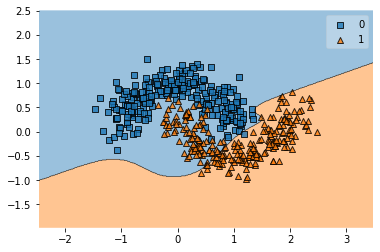

F1 score: 0.7572815533980582


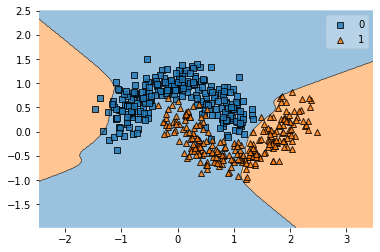

F1 score: 0.6170212765957447
--- Best model ---


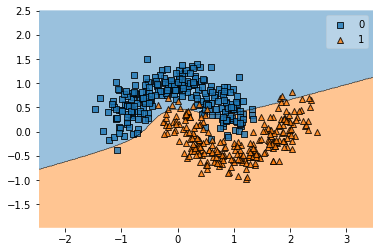

F1 score: 0.9076923076923077
Best degree: 3
Best F1: 0.9076923076923077


In [8]:
VERBOSE = True

svm_params = {
    'kernel': 'poly',
    'tol': 0.001,
    'random_state': RND_SEED,
    'degree': 3,
}

grid_params = list(range(1, 11))
svm_f1_scores = []

for degree in grid_params:
    svm_params['degree'] = degree
    svm_f1_scores.append(svm_model_selection(svm_params, plot=VERBOSE))
    
print('--- Best model ---')
optimal_degree = grid_params[np.argmax(svm_f1_scores)]
svm_params['degree'] = optimal_degree
best_f1_score = svm_model_selection(svm_params, plot=True)
print(f'Best degree: {optimal_degree}')
print(f'Best F1: {best_f1_score}')

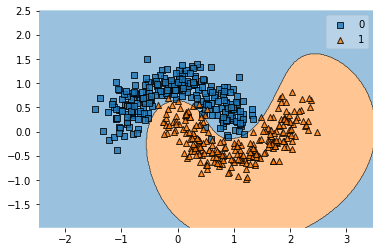

F1 score: 0.9841269841269841


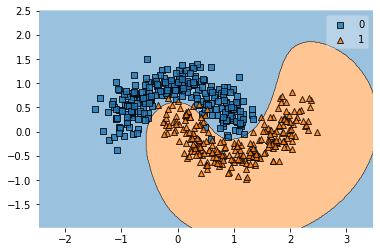

F1 score: 0.976


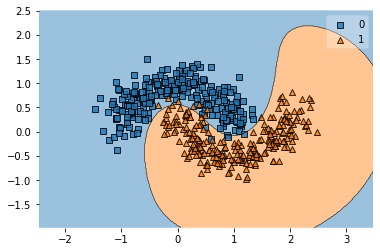

F1 score: 0.967741935483871


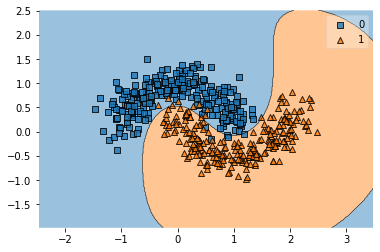

F1 score: 0.967741935483871


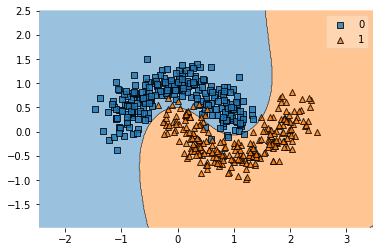

F1 score: 0.967741935483871


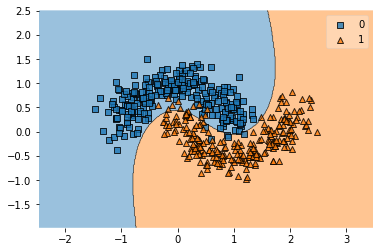

F1 score: 0.959349593495935


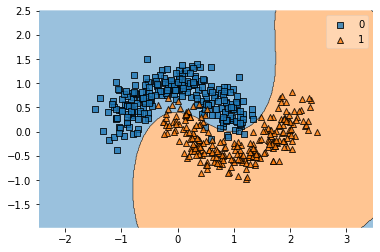

F1 score: 0.967741935483871


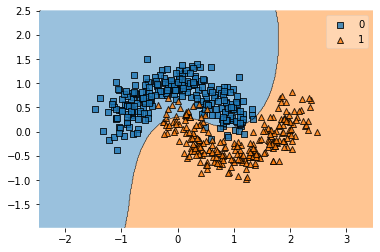

F1 score: 0.9180327868852458


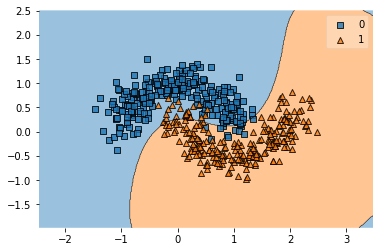

F1 score: 0.9090909090909092


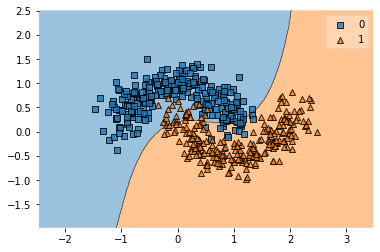

F1 score: 0.8925619834710744


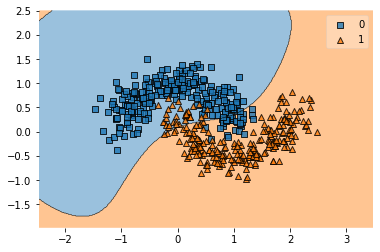

F1 score: 0.870967741935484


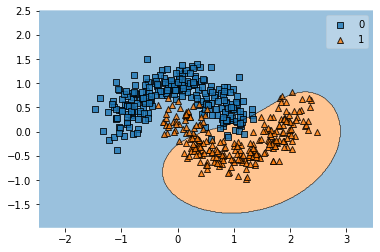

F1 score: 0.8620689655172413
--- Best model ---


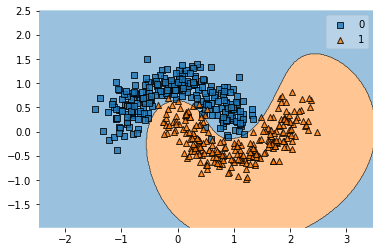

F1 score: 0.9841269841269841
Best C: 10
Best F1: 0.9841269841269841


In [9]:
VERBOSE = True

svm_params = {
    'kernel': 'rbf',
    'random_state': RND_SEED,
    'C': None,
}

grid_params = [10, 5, 1, 0.8, 0.5, 0.3, 0.2, 0.1, 0.08, 0.05, 0.02, 0.01]
svm_f1_scores = []

for param in grid_params:
    svm_params['C'] = param
    svm_f1_scores.append(svm_model_selection(svm_params, plot=VERBOSE))
    
print('--- Best model ---')
optimal_param = grid_params[np.argmax(svm_f1_scores)]
svm_params['C'] = optimal_param
best_f1_score = svm_model_selection(svm_params, plot=True)
print(f'Best C: {optimal_param}')
print(f'Best F1: {best_f1_score}')

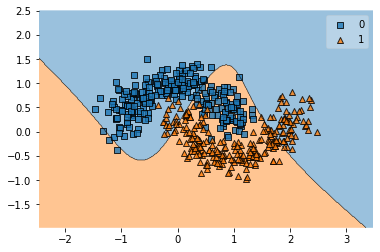

F1 score: 0.6666666666666667


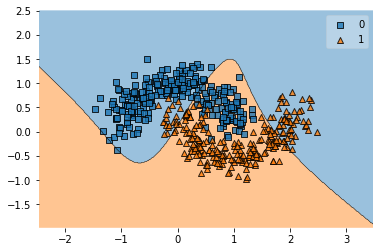

F1 score: 0.6666666666666667


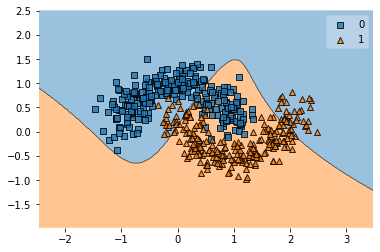

F1 score: 0.7407407407407407


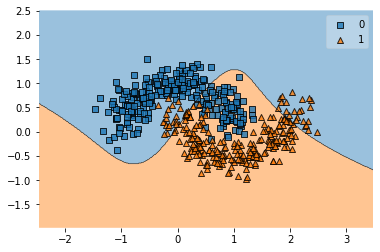

F1 score: 0.7499999999999999


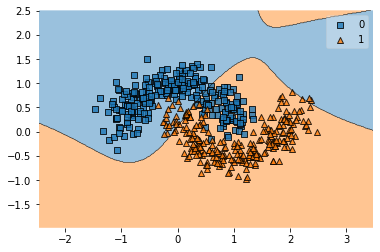

F1 score: 0.8028169014084506


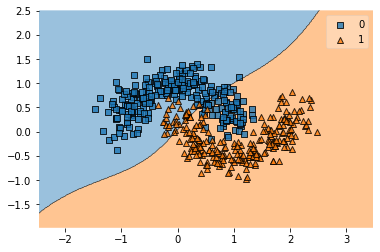

F1 score: 0.8208955223880597


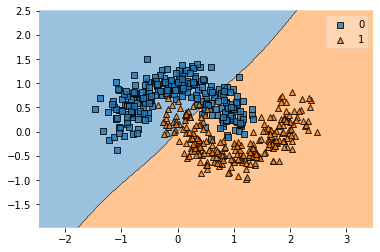

F1 score: 0.81203007518797
--- Best model ---


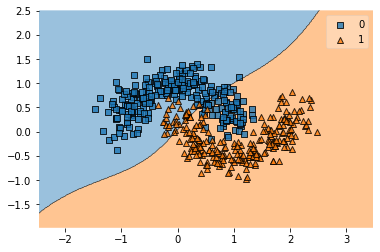

F1 score: 0.8208955223880597
Best C: 0.02
Best F1: 0.8208955223880597


In [10]:
VERBOSE = True

svm_params = {
    'kernel': 'sigmoid',
    'random_state': RND_SEED,
    'C': None,
}

grid_params = [0.3, 0.2, 0.1, 0.08, 0.05, 0.02, 0.01]
svm_f1_scores = []

for param in grid_params:
    svm_params['C'] = param
    svm_f1_scores.append(svm_model_selection(svm_params, plot=VERBOSE))
    
print('--- Best model ---')
optimal_param = grid_params[np.argmax(svm_f1_scores)]
svm_params['C'] = optimal_param
best_f1_score = svm_model_selection(svm_params, plot=True)
print(f'Best C: {optimal_param}')
print(f'Best F1: {best_f1_score}')

- Лучшее качество показал rbf: с параметром C = 10 F1 метрика: 0.9841 на тестовой выборке.
- В случае poly границы классов имели вид многчленов некоторой степени. В случае rbf образовывали некоторую замкнутую область, а в случае sigmoid граница имеет вид кривой.
- Перебором по некоторому множеству значений удалось установить, что лучшее значение метрики F1 на тесте удается получить при degree=3.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [11]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

logreg_params = {
    'max_iter': 500,
    'C': 0.3,
    'random_state': RND_SEED,
    'tol': 0.001
}

grid_params = list(range(1, 11))
logreg_f1_scores = []

for param in grid_params:
    poly_preprocessor = PolynomialFeatures(degree=param)
    standart_scaler = StandardScaler()
    X_train_tranformed = standart_scaler.fit_transform(poly_preprocessor.fit_transform(X_train))
    X_test_transformed = standart_scaler.transform(poly_preprocessor.transform(X_test))
    logreg_f1_scores.append(svm_model_selection(
        logreg_params,
        model_class=LogisticRegression,
        X_train=X_train_tranformed,
        y_train=y_train,
        X_test=X_test_transformed,
        y_test=y_test,
    ))
    
optimal_param = grid_params[np.argmax(logreg_f1_scores)]
poly_preprocessor = PolynomialFeatures(degree=optimal_param)
standart_scaler = StandardScaler()
X_train_tranformed = standart_scaler.fit_transform(poly_preprocessor.fit_transform(X_train))
X_test_transformed = standart_scaler.transform(poly_preprocessor.transform(X_test))
best_f1_score = svm_model_selection(
        logreg_params,
        model_class=LogisticRegression,
        X_train=X_train_tranformed,
        y_train=y_train,
        X_test=X_test_transformed,
        y_test=y_test,
    )
print(f'Best degree: {optimal_param}')
print(f'Best F1: {best_f1_score}')

Best degree: 7
Best F1: 0.9354838709677419


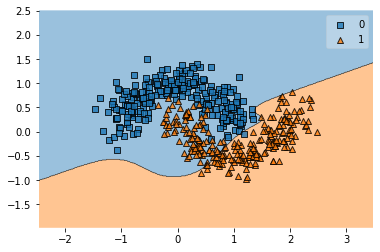

F1 score: 0.7572815533980582


In [12]:
svm_params = {
    'kernel': 'poly',
    'tol': 0.001,
    'random_state': RND_SEED,
    'degree': 9,
}

svm_model = SVC(**svm_params)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
plot_decision_regions(moons_points, moons_labels, svm_model)
plt.show()
print(f'F1 score: {f1_score(y_test, svm_y_pred)}')

- LogReg с параметром degree=7 в PolynomialFeatures показал значение метрики лучше, чем SVC с тем же значением параметра degree: 0.7573
- SVC выделил границу достаточно неточно. Отобразить границу LogisticRegression невозможно, т.к. использование PolynomialFeatures приводит к увеличению размерности пространства признаков

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

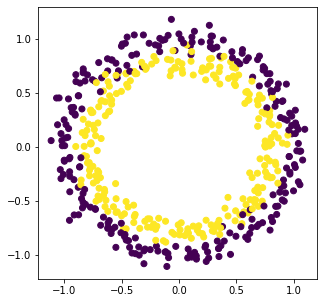

In [13]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

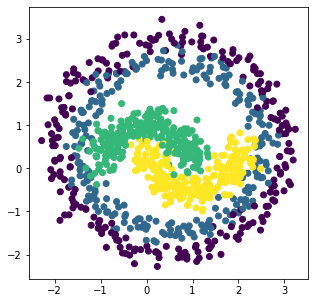

In [14]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [15]:
from tqdm import tqdm

def svm_model_selection(svm_params: dict, plot: str = False, model_class = SVC, \
                        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, plot_X=moons_points, plot_y=moons_labels) -> float:
    model = model_class(**svm_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    svm_f1_score = f1_score(y_test, y_pred, average='macro')

    if plot:
        plot_decision_regions(plot_X, plot_y, model)
        plt.show()
        print(f'F1 score: {svm_f1_score}')
        
    return svm_f1_score

X_train, X_test, y_train, y_test = train_test_split(
    points,
    labels,
    random_state=RND_SEED,
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:33<00:00,  2.42s/it]


--- Best model ---


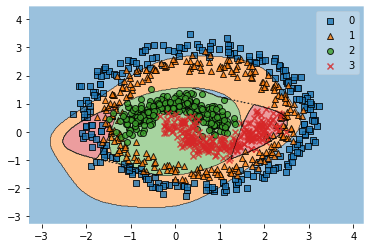

F1 score: 0.6746061536502713
Best degree: 6
Best F1: 0.6746061536502713


In [16]:
VERBOSE = False

svm_params = {
    'kernel': 'poly',
    'tol': 0.001,
    'random_state': RND_SEED,
    'degree': 3,
}

grid_params = list(range(1, 15))
svm_f1_scores = []

for degree in tqdm(grid_params):
    svm_params['degree'] = degree
    svm_f1_scores.append(svm_model_selection(
        svm_params,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        plot=VERBOSE,
        plot_X=points,
        plot_y=labels,
    ))
    
print('--- Best model ---')
optimal_degree = grid_params[np.argmax(svm_f1_scores)]
svm_params['degree'] = optimal_degree
best_f1_score = svm_model_selection(
        svm_params,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        plot=True,
        plot_X=points,
        plot_y=labels,
    )
print(f'Best degree: {optimal_degree}')
print(f'Best F1: {best_f1_score}')

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 105.86it/s]


--- Best model ---


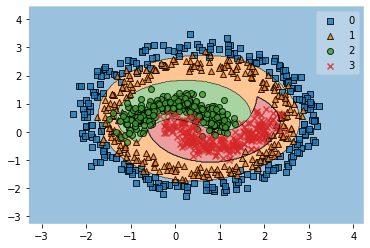

F1 score: 0.9477959522716555
Best C: 2.8636363636363638
Best F1: 0.9477959522716555


In [17]:
VERBOSE = False

svm_params = {
    'kernel': 'rbf',
    'random_state': RND_SEED,
    'C': None,
}

grid_params = np.linspace(0.5, 5, 100)
svm_f1_scores = []

for param in tqdm(grid_params):
    svm_params['C'] = param
    svm_f1_scores.append(svm_model_selection(
        svm_params,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        plot=VERBOSE,
        plot_X=points,
        plot_y=labels,
    ))
    
print('--- Best model ---')
optimal_param = grid_params[np.argmax(svm_f1_scores)]
svm_params['C'] = optimal_param
best_f1_score = svm_model_selection(
        svm_params,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        plot=True,
        plot_X=points,
        plot_y=labels,
    )
print(f'Best C: {optimal_param}')
print(f'Best F1: {best_f1_score}')

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.68it/s]


--- Best model ---


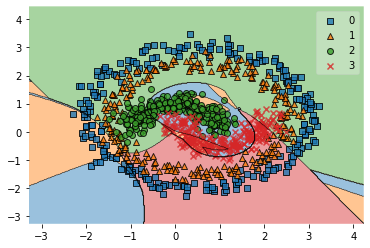

F1 score: 0.13605361055216808
Best C: 0.5
Best F1: 0.13605361055216808


In [18]:
VERBOSE = False

svm_params = {
    'kernel': 'sigmoid',
    'random_state': RND_SEED,
    'C': None,
}

grid_params = np.linspace(0.5, 5, 100)
svm_f1_scores = []

for param in tqdm(grid_params):
    svm_params['C'] = param
    svm_f1_scores.append(svm_model_selection(
        svm_params,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        plot=VERBOSE,
        plot_X=points,
        plot_y=labels,
    ))
    
print('--- Best model ---')
optimal_param = grid_params[np.argmax(svm_f1_scores)]
svm_params['C'] = optimal_param
best_f1_score = svm_model_selection(
        svm_params,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        plot=True,
        plot_X=points,
        plot_y=labels,
    )
print(f'Best C: {optimal_param}')
print(f'Best F1: {best_f1_score}')

Видно, что SVC с ядром rbf и параметром C=2.9091 показывает наилучший результат (метрика F1 macro). Таким образом, наилучшая модель:

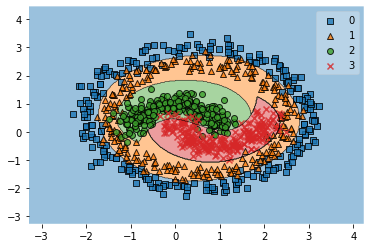

F1 score: 0.9477959522716555


In [19]:
svm_params = {
    'kernel': 'rbf',
    'random_state': RND_SEED,
    'C': None,
}

optimal_param = grid_params[np.argmax(svm_f1_scores)]
svm_params['C'] = 2.9091
best_f1_score = svm_model_selection(
        svm_params,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        plot=True,
        plot_X=points,
        plot_y=labels,
    )

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

logreg_params = {
    'max_iter': 1000,
    'C': 0.3,
    'random_state': RND_SEED,
    'tol': 0.001
}

grid_params = list(range(1, 11))
logreg_f1_scores = []

for param in grid_params:
    poly_preprocessor = PolynomialFeatures(degree=param)
    standart_scaler = StandardScaler()
    X_train_tranformed = standart_scaler.fit_transform(poly_preprocessor.fit_transform(X_train))
    X_test_transformed = standart_scaler.transform(poly_preprocessor.transform(X_test))
    logreg_f1_scores.append(svm_model_selection(
        logreg_params,
        model_class=LogisticRegression,
        X_train=X_train_tranformed,
        y_train=y_train,
        X_test=X_test_transformed,
        y_test=y_test,
    ))
    
optimal_param = grid_params[np.argmax(logreg_f1_scores)]
poly_preprocessor = PolynomialFeatures(degree=optimal_param)
standart_scaler = StandardScaler()
X_train_tranformed = standart_scaler.fit_transform(poly_preprocessor.fit_transform(X_train))
X_test_transformed = standart_scaler.transform(poly_preprocessor.transform(X_test))
best_f1_score = svm_model_selection(
        logreg_params,
        model_class=LogisticRegression,
        X_train=X_train_tranformed,
        y_train=y_train,
        X_test=X_test_transformed,
        y_test=y_test,
        plot_X=points,
        plot_y=labels,
    )
print(f'Best C: {optimal_param}')
print(f'Best F1: {best_f1_score}')

Best C: 4
Best F1: 0.8579408421193412


Из вывода выше видно, что при оптимальном значении степени PolynomialFeatures удается достичь значения F1-метрики: 0.86, что хуже результата, который показал SVC с наилучшими параметрами: 0.9478.